In [2]:
# Imported the panda library
import pandas as pd

In [3]:
# Load data
df = pd.read_csv("owid-covid-data.csv")

# View column names
print(df.columns)

In [5]:
# Preview first 5 rows
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [6]:
# Check for missing values
print(df.isnull().sum())

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64


In [9]:
# Performing data cleaning

In [7]:
# Focus countries: Kenya, USA, India
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

In [10]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [11]:
# Drop rows with missing critical values
df = df.dropna(subset=['total_cases', 'total_deaths', 'total_vaccinations'])

In [32]:
# Fill remaining missing numeric data
df = df.ffill()
# forward-fill by date for each country

In [20]:
# Checked to confirm the dropping of null values
print(df.isnull().sum())

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       1271
excess_mortality_cumulative                1271
excess_mortality                           1271
excess_mortality_cumulative_per_million    1271
Length: 67, dtype: int64


In [21]:
# Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

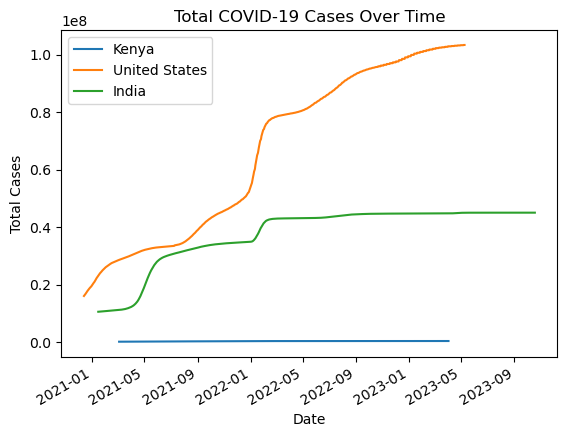

In [35]:
# Plot total cases over time
for country in countries:
    df[df['location'] == country].groupby('date')['total_cases'].max().plot(label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

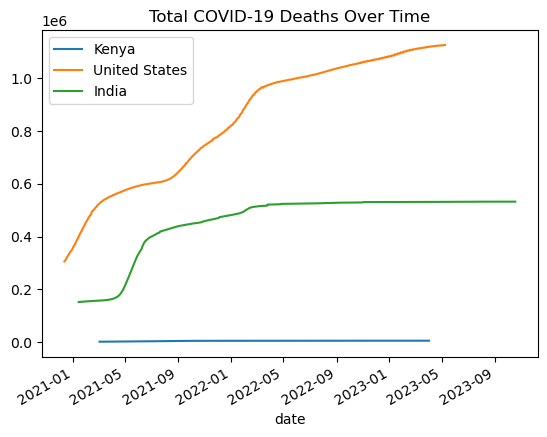

In [36]:
# Plot total deaths over time
for country in countries:
    df[df['location'] == country].groupby('date')['total_deaths'].max().plot(label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.legend()
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


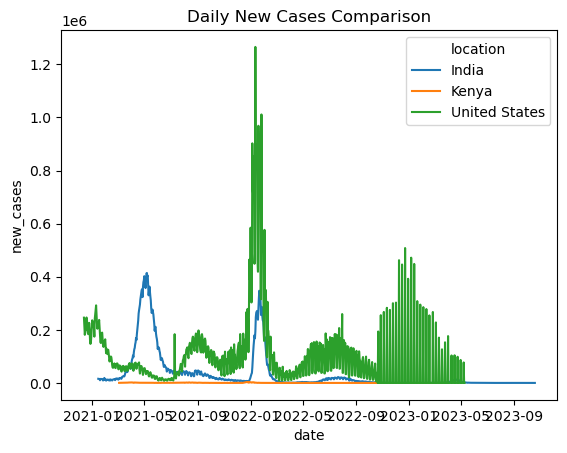

In [37]:
# Compare daily new cases
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title("Daily New Cases Comparison")
plt.show()   

In [38]:
# Death Rate Calculation
df['death_rate'] = df['total_deaths'] / df['total_cases']

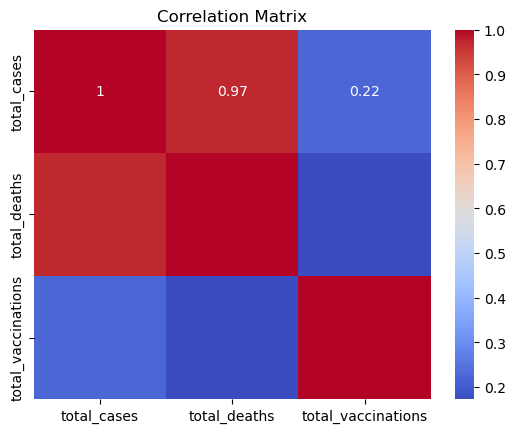

In [39]:
# Correlation heatmap
corr = df[['total_cases', 'total_deaths', 'total_vaccinations']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

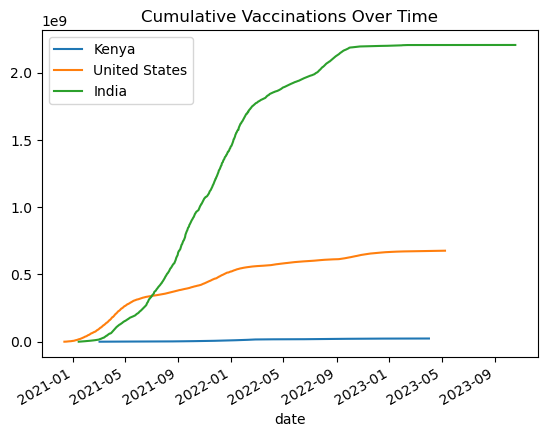

In [40]:
# Cumulative vaccination over time
for country in countries:
    df[df['location'] == country].groupby('date')['total_vaccinations'].max().plot(label=country)
plt.title('Cumulative Vaccinations Over Time')
plt.legend()
plt.show()

# Percentage vaccinated
df['%_vaccinated'] = df['people_vaccinated'] / df['population'] * 100


In [45]:
## Key Insights

# 1. India has the highest cumulative cases among the selected countries.
# 2. The USA had earlier peaks in both cases and deaths.
# 3. Kenya showed null values, this could be an issue in the original dataset.
# 4. Death rates are not directly proportional to total cases.
# 5. Vaccination rollout significantly slowed case growth after Q3 2021.